In [1]:
# coding:utf-8
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import pdb
import glob

%matplotlib inline

In [2]:
hist_E_list = glob.glob('/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E*')
obj_list = glob.glob('/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/obj*')

hist_E_list = hist_E_list[10:] + hist_E_list[:10]
obj_list = obj_list[10:] + obj_list[:10]
hist_E_list, obj_list

(['/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_5mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_6mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_7mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_8mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_9mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_10mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_11mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_12mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_13mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_14mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_15mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_20mix.pkl',
  '/Users/Daigo/Data/ShadeRatio/Machida3h/Exp_result/Exp1/hist_E_30mix.pkl',
  '/

In [3]:
# shape(mixture, frame, iterate)
hist_E = np.zeros(shape = (15, 73, 100))
# shape(mixture, frame, model)
obj = np.zeros(shape = (15, 73, 3))

In [4]:
for i, (hist_path, obj_path) in enumerate(zip(hist_E_list, obj_list)):
    
    with open(hist_path, 'rb') as f:
        hist_E[i] = pickle.load(f)
    with open(obj_path, 'rb') as f:
        obj[i] = pickle.load(f)

In [33]:
# convert dataframe (row:data, column:[obj_value, mixture, method])
df = pd.DataFrame(columns=['objective', 'frame','mixture', 'method'])

mixture_list = [5,6,7,8,9,10,11,12,13,14,15,20,30,40,50]

for mix in range(obj.shape[0]):
    for frm in range(obj.shape[1]) :
        for method in range(obj.shape[2]):
            
            if method == 0:
                met = 'Epanechnikov'
            elif method == 1:
                met = 'Gaussian'
            elif method == 2:
                met = 'min'
                
                
            df2 = pd.DataFrame([[obj[mix, frm, method], np.int(frm), mixture_list[mix], met]], columns=df.columns)
            
            df = df.append(df2, ignore_index=True)

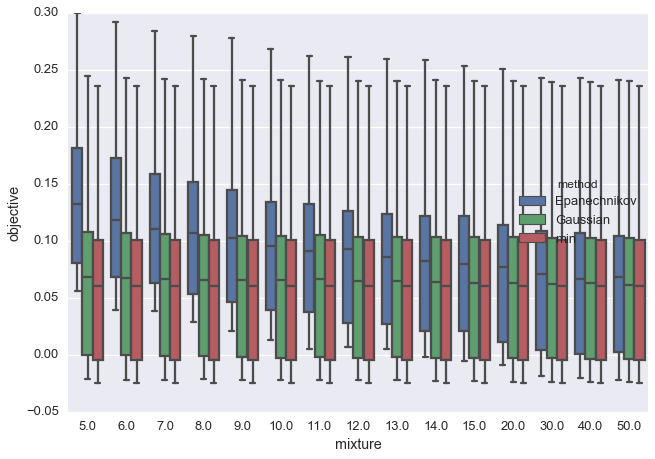

In [54]:
sns.set_context = 'talk'
sns.boxplot(x = 'mixture', y = 'objective', data = df, hue='method')
sns.plt.savefig('/Users/Daigo/Desktop/compare_full.png')

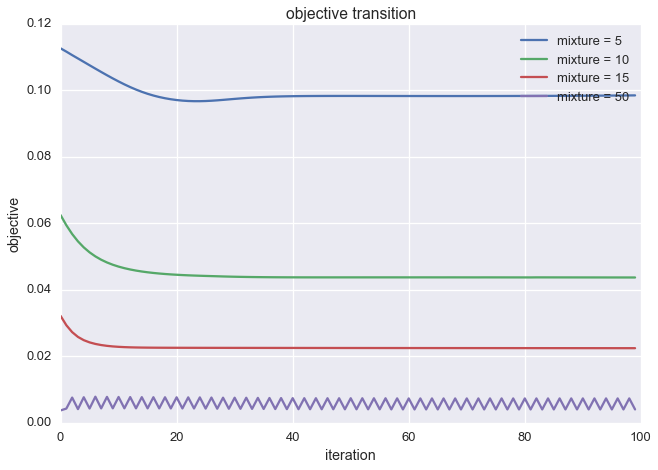

In [79]:
sns.set_context = 'paper'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(hist_E[0, 0, :], label = 'mixture = 5')
ax.plot(hist_E[6, 0,:], label = 'mixture = 10')
ax.plot(hist_E[10, 0, :], label = 'mixture = 15')
ax.plot(hist_E[14, 0, :], label = 'mixture = 50')
ax.set_xlabel('iteration')
ax.set_ylabel('objective')
ax.set_title('objective transition')
ax.legend()
plt.savefig('/Users/Daigo/Desktop/obj_trans.png')

In [80]:
! git add Consideration.ipynb
! git commit -m 'initial commit'
! git push

fatal: pathspec 'Consederation.ipynb' did not match any files
On branch master
Your branch is up-to-date with 'origin/master'.
Untracked files:
	.python-version
	Consideration.ipynb
	__pycache__/
	../__pycache__/
	../misc/__pycache__/

nothing added to commit but untracked files present
Everything up-to-date
